# Reading `handwritten-smhi-9k` dataset via Hugging Face

- https://webdataset.github.io/webdataset/
- https://huggingface.co/docs/hub/datasets-webdataset#the-webdataset-format

In [1]:
import webdataset as wds
try:
    from huggingface_hub import get_token
except ImportError:
    # Must have gotten removed in some version :)
    from huggingface_hub import HfFolder
    get_token = HfFolder().get_token

hf_token = get_token()

url = "https://huggingface.co/datasets/ai-for-obs/handwritten-smhi-9k/resolve/main/webdataset-images-labels-000.tar"

url = f"pipe:curl -s -L {url} -H 'Authorization:Bearer {hf_token}'"

dataset = wds.WebDataset(url)

# Raw images

In [8]:
sample = next(iter(dataset.shuffle(42)))
sample.keys()

dict_keys(['__key__', '__url__', 'png', 'txt'])

In [9]:
sample["txt"]

b'39.0'

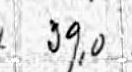

In [10]:
from IPython.display import Image

Image(sample["png"])

# Decoding PNG -> Numpy

In [5]:
sample = next(iter(dataset.decode("rgb").shuffle(42)))
sample.keys()

dict_keys(['__key__', '__url__', 'png', 'txt'])

In [6]:
sample["txt"]

'10'

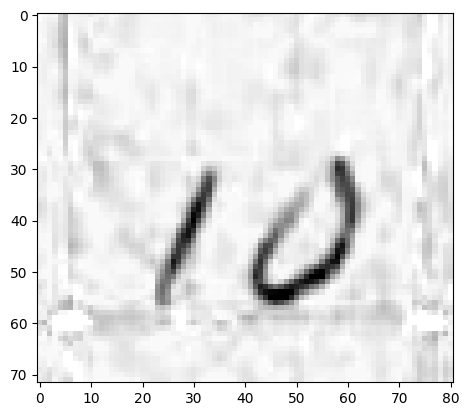

In [7]:
import matplotlib.pyplot as plt


plt.imshow(sample["png"])